# Librería *datapack*: Guía rápida

En este tutorial introductorio se explican las principales funcionalidades de la librería **datapack**. Esta librería incluye funciones que permiten trabajar con conjuntos de datos numéricos, lógicos, categóricos o mixtos. La librería utiliza un enfoque orientado a objetos, por lo que la gestión del conjunto de datos se realiza a través de la clase *Dataset*.

In [1]:
from datapack import dataset, plots

## Inicialización y gestión del conjunto de datos

A lo largo de este documento trabajaremos con el conjunto de datos de ejemplo *fruits.csv*, el cuál es un conjunto de datos de juguete que incluye información sobre las remesas de fruta disponibles en una frutería. Este conjunto de datos está compuesto por los siguientes atributos.

- **Code:** Código de la fruta.
- **Fruit:** Tipo de fruta.
- **Quantity:** Cantidad de unidades.
- **Weight:** Peso medio.
- **Color:** Color.
- **Expensive:** Si la remesa es cara o no (según el criterio del vendedor).

La variable clase de este conjunto de datos (es decir, la variable que se busca predecir) es la variable *Expensive*. Teniendo esto en cuenta, inicializamos nuestro conjunto de datos a partir del fichero *fruits.csv* mediante la función *from_csv*. El nombre de la variable clase se indica a través del parámetro *c*.

In [2]:
MyDataset = dataset.Dataset()
MyDataset.from_csv("./tutorial_data/fruits.csv",header=True,c="Expensive")

La función *from_csv* no es la única forma de inicializar un objeto *Dataset*. Otra posible opción es pasar un dataframe a la función constructora de la clase que incluya la información del conjunto de datos. Si el objeto *Dataset* ya estaba creado con anterioridad, esto también se puede hacer a través de la función *set_data*. A continuación se muestran algunos ejemplos de estas formas alternativas de inicialización.

In [3]:
import pandas as pd

df = pd.read_csv("./tutorial_data/fruits.csv",header=0)

MyDataset2 = dataset.Dataset(df,"Expensive")

MyDataset3 = dataset.Dataset()
MyDataset3.set_data(df,c="Expensive")

Una vez inicializado nuestro conjunto de datos, podemos visualizar su contenido. Para ello, utilizamos la función *print_dataset*.

In [4]:
MyDataset.print_dataset()

,Code,Fruit,Quantity,Weight,Color,Expensive
0,1,Apple,3,2.2,Red,False
1,4,Orange,2,3.1,Orange,False
2,3,Banana,5,1.0,Yellow,True
3,5,Watermelon,4,9.7,Green,True
4,1,Apple,8,1.6,Green,False
5,19,Guava,7,4.5,Green,True
6,12,Pineapple,1,6.5,Brown,True
7,8,Lima,4,2.3,Green,False
8,7,Lemon,1,3.8,Yellow,True
9,2,Pear,6,2.4,Green,True


Dataset class: Expensive


Como se puede observar, los contenidos del conjunto de datos se imprimen en formato tabla. Además, también se indica el nombre de la variable clase. Si bien este tipo de visualización es muy similar a la que podemos obtener mediante dataframes, cabe destacar que la estructura interna de la clase *Dataset* NO es un dataframe, sino un diccionario donde cada entrada corresponde a un atributo. En caso de querer obtener un dataframe equivalente, podemos conseguirlo mediante la función *to_dataframe*.

In [5]:
df = MyDataset.to_dataframe()
display(df)
type(df)

,Code,Fruit,Quantity,Weight,Color,Expensive
0,1,Apple,3,2.2,Red,False
1,4,Orange,2,3.1,Orange,False
2,3,Banana,5,1.0,Yellow,True
3,5,Watermelon,4,9.7,Green,True
4,1,Apple,8,1.6,Green,False
5,19,Guava,7,4.5,Green,True
6,12,Pineapple,1,6.5,Brown,True
7,8,Lima,4,2.3,Green,False
8,7,Lemon,1,3.8,Yellow,True
9,2,Pear,6,2.4,Green,True


pandas.core.frame.DataFrame

Además de la visualización global del conjunto de datos, el paquete *datapack* también ofrece la opción de consultar la información de cada uno de los atributos por separado. Para ello, los atributos individuales se pueden obtener mediante la función *get_attribute*. Después, usamos la función *print_data* para imprimir su información.

In [6]:
MyDataset.get_attribute("Code").print_data()
print()
MyDataset.get_attribute("Fruit").print_data()
print()
MyDataset.get_attribute("Quantity").print_data()
print()
MyDataset.get_attribute("Weight").print_data()
print()
MyDataset.get_attribute("Color").print_data()
print()
MyDataset.get_attribute("Expensive").print_data()

Attribute type: Numerical
Attribute values:
0     1
1     4
2     3
3     5
4     1
5    19
6    12
7     8
8     7
9     2
Name: Code, dtype: int64

Attribute type: String
Attribute values:
0         Apple
1        Orange
2        Banana
3    Watermelon
4         Apple
5         Guava
6     Pineapple
7          Lima
8         Lemon
9          Pear
Name: Fruit, dtype: object

Attribute type: Numerical
Attribute values:
0    3
1    2
2    5
3    4
4    8
5    7
6    1
7    4
8    1
9    6
Name: Quantity, dtype: int64

Attribute type: Numerical
Attribute values:
0    2.2
1    3.1
2    1.0
3    9.7
4    1.6
5    4.5
6    6.5
7    2.3
8    3.8
9    2.4
Name: Weight, dtype: float64

Attribute type: String
Attribute values:
0       Red
1    Orange
2    Yellow
3     Green
4     Green
5     Green
6     Brown
7     Green
8    Yellow
9     Green
Name: Color, dtype: object

Attribute type: Boolean
Attribute values:
0    False
1    False
2     True
3     True
4    False
5     True
6     True
7    

Como se puede observar, las variables de nuestro conjunto de datos son de tres tipos distintos: tipo numérico (clase *Numerical*), tipo string (clase *String*) y tipo lógico (clase *Boolean*). Sin embargo, hay otro tipo de datos con los que se puede trabajar en la librería *datapack*: los datos categóricos (clase *Categorical*).

Este tipo de datos son equivalentes a las variables tipo *factor* en R. La principal particularidad de los datos categóricos es que solo pueden tomar una cierta cantidad de valores. Por ejemplo, imaginemos que tenemos una variable *Shop* que nos indica en qué tienda está disponible una remesa de frutas concreta. Si solo hay dos fruterias en la ciudad (por ejemplo, *Tienda Marlo* y *Tienda Pepe*), sabemos que cualquier otro valor que se introduzca en dicha variable es incorrecto. Por lo tanto, en estos casos el tipo de variable categórico es la mejor opción.

Como ejemplo, añadimos el atributo categórico *Shop* a nuestro conjunto de datos. Para ello, primero hay que añadirlo como variable tipo string mediante la función *add_attribute*, y después utilizar la función *to_categorical_attribute* para convertirlo en un atributo categórico. La colección de valores admitidos en la variable categórica se indica mediante el parámetro *values*.

In [7]:
MyDataset.add_attribute("Shop",["Tienda Marlo","Tienda Marlo","Tienda Pepe","Tienda Pepe","Tienda Marlo","Tienda Marlo","Tienda Marlo","Tienda Pepe","Tienda Marlo","Tienda Marlo"])
MyDataset.to_categorical_attribute("Shop",values=["Tienda Marlo","Tienda Pepe"])
MyDataset.get_attribute("Shop").print_data()

Attribute type: Categorical
Allowed values:  {'Tienda Marlo', 'Tienda Pepe'}
Attribute values:
0    Tienda Marlo
1    Tienda Marlo
2     Tienda Pepe
3     Tienda Pepe
4    Tienda Marlo
5    Tienda Marlo
6    Tienda Marlo
7     Tienda Pepe
8    Tienda Marlo
9    Tienda Marlo
dtype: object


De esta forma, ya hemos creado un atributo categórico. Si intentamos modificar la primera entrada de dicho atributo mediante la función *update_instance* y le asignamos un valor que no está dentro de los valores permitidos, obtenemos un error.

In [8]:
try:
    MyDataset.update_instance(0,"Shop","Tienda Maria")
except NameError as e:
    print("ERROR: ",e)

ERROR:  Invalid new value. Allowed values are: {'Tienda Marlo', 'Tienda Pepe'}


Al igual que podemos añadir atributos, también tenemos la opción de eliminar los ya existentes mediante la función *remove_attribute*. Una vez hayamos terminado de trabajar con nuestro conjunto de datos, la función *to_csv* nos permite guardar todos los cambios realizados en un fichero *.csv*.

In [9]:
MyDataset.to_csv("./tutorial_data/fruits_new.csv",header=True,sep=";")

## Métricas para la exploración de datos

Además de las funcionalidades para la gestión del conjunto de datos, la clase *Dataset* ofrece una colección de métricas univariadas y bivariadas que pueden ser muy útiles a la hora de realizar un análisis exploratorio. Dichas métricas pueden calcularse para un solo atributo o para todos al mismo tiempo.

### Métricas univariadas

La librería *datapack* dispone de métricas univariadas tanto para atributos numéricos como no numéricos. En el caso de las variables numéricas, podemos calcular la media, la mediana y la varianza de los datos. Esto se puede realizar mediante las funciones *mean*, *median* y *variance* en el caso de un único atributo, y mediante las funciones *mean_att*, *median_att* y *variance_att* en el caso del conjunto de datos entero.

In [10]:
print("Mean of Weight:")
print(MyDataset.mean("Weight"))
print()
print("Median of Weight:")
print(MyDataset.median("Weight"))
print()
print("Variance of Weight:")
print(MyDataset.variance("Weight"))
print()
print("Mean of all the numerical attributes:")
print(MyDataset.mean_att())
print()
print("Median of all the numerical attributes:")
print(MyDataset.median_att())
print()
print("Variance of all the numerical attributes:")
print(MyDataset.variance_att())

Mean of Weight:
3.7099999999999995

Median of Weight:
2.75

Variance of Weight:
6.938777777777777

Mean of all the numerical attributes:
{'Code': 6.2, 'Fruit': nan, 'Quantity': 4.1, 'Weight': 3.7099999999999995, 'Color': nan, 'Expensive': nan, 'Shop': nan}

Median of all the numerical attributes:
{'Code': 4.5, 'Fruit': nan, 'Quantity': 4.0, 'Weight': 2.75, 'Color': nan, 'Expensive': nan, 'Shop': nan}

Variance of all the numerical attributes:
{'Code': 32.17777777777778, 'Fruit': nan, 'Quantity': 5.877777777777777, 'Weight': 6.938777777777777, 'Color': nan, 'Expensive': nan, 'Shop': nan}


Como se puede observar, las funciones que calculan las métricas para el conjunto de datos completo devuelven un diccionario con los resultados correspondientes para cada atributo. En caso de que una métrica no pueda aplicarse a un atributo concreto (por ejemplo, la media a una variable tipo string), se devuelve el valor **nan**.

Pasando ahora a las variables no numéricas (string, boolean...), las métricas univariadas disponibles son la moda y la entropía. Dichas métricas se pueden calcular a través de las funciones *mode* y *entropy* en el caso de un único atributo, y a través las funciones *mode_att* y *entropy_att* en el caso del conjunto de datos entero.

In [11]:
print("Mode of Color:")
print(MyDataset.mode("Color"))
print()
print("Entropy of Color:")
print(MyDataset.entropy("Color"))
print()
print("Mode of all the non-numerical attributes:")
print(MyDataset.mode_att())
print()
print("Entropy of all the non-numerical attributes:")
print(MyDataset.entropy_att())

Mode of Color:
Green

Entropy of Color:
1.9609640474436814

Mode of all the non-numerical attributes:
{'Code': nan, 'Fruit': 'Apple', 'Quantity': nan, 'Weight': nan, 'Color': 'Green', 'Expensive': True, 'Shop': 'Tienda Marlo'}

Entropy of all the non-numerical attributes:
{'Code': nan, 'Fruit': 3.121928094887362, 'Quantity': nan, 'Weight': nan, 'Color': 1.9609640474436814, 'Expensive': 0.9709505944546686, 'Shop': 0.8812908992306927}


### Métricas bivariadas

Además de las métricas univariadas, la librería *datapack* también incluye una pequeña colección de métricas bivariadas que sirven para analizar la relación entre pares de variables. Por ejemplo, dadas dos variables numéricas, la función *correlation* permite calcular la correlación entre las mismas. El coeficiente de correlación a utilizar puede ser especificado a través del parámetro *method*, donde las opciones disponibles son Pearson, Spearman y Kendall. En caso de querer calcular las correlaciones entre todos los pares de variables numéricas, la matriz de correlación completa puede ser calculada a través de la función *correlation_att*.

In [12]:
print("Pearson correlation between Weight and Quantity:")
print(MyDataset.correlation("Weight","Quantity",method="pearson"))
print()
print("Spearman correlation between Weight and Quantity:")
print(MyDataset.correlation("Weight","Quantity",method="spearman"))
print()
print("Kendall correlation between Weight and Quantity:")
print(MyDataset.correlation("Weight","Quantity",method="kendall"))
print()
print("Pearson correlation matrix:")
mat = MyDataset.correlation_att(method="pearson")
for key,val in mat.items():
    print(key,": ",val)

Pearson correlation between Weight and Quantity:
-0.30116637922050404

Spearman correlation between Weight and Quantity:
-0.3963488316574177

Kendall correlation between Weight and Quantity:
-0.29553088043720516

Pearson correlation matrix:
Code :  {'Code': 1.0, 'Fruit': nan, 'Quantity': -0.03393299363302283, 'Weight': 0.37908605443198395, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Fruit :  {'Code': nan, 'Fruit': nan, 'Quantity': nan, 'Weight': nan, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Quantity :  {'Code': -0.03393299363302283, 'Fruit': nan, 'Quantity': 1.0, 'Weight': -0.30116637922050404, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Weight :  {'Code': 0.379086054431984, 'Fruit': nan, 'Quantity': -0.30116637922050404, 'Weight': 1.0, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Color :  {'Code': nan, 'Fruit': nan, 'Quantity': nan, 'Weight': nan, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Expensive :  {'Code': nan, 'Fruit': nan, 'Quantity': nan, 'Weight': nan, 'Color': nan, '

Dado que la matriz de correlaciones se devuelve como un diccionario de diccionarios, visualizar los resultados en formato de texto puede resultar algo confuso. Por este motivo, tenemos la opción de visualizar la matriz de correlaciones en forma de mapa de calor a través de la función *plot_correlation*. Todas las gráficas que ofrece el paquete *datapack* están generadas mediante las librerías *matplotlib* y *seaborn*.

Pearson correlation matrix:


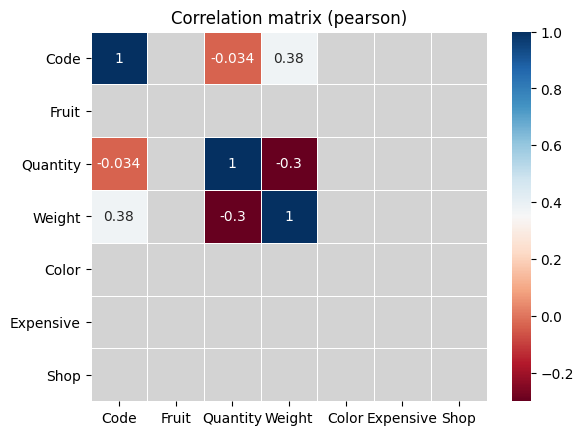

In [13]:
print("Pearson correlation matrix:")
plots.plot_correlation(MyDataset,method="pearson")

En el caso de las variables no numéricas, la métrica bivariada de interrelación que está disponible en la librería es la información mutua normalizada ($NMI$). Esta métrica se calcula de la siguiente forma:

$NMI(X;Y) = \frac{2I(X;Y)}{H(X)+H(Y)}$

donde $I$ es la información mutua entre variables y $H$ es la entropía. La $NMI$ puede calcularse para un par de atributos (*norm_mutual_info*) o para el conjunto de datos entero (*norm_mutual_info_att*).

In [14]:
print("Normalized mutual information between Fruit and Color:")
print(MyDataset.norm_mutual_info("Fruit","Color"))
print()
print("Normalized mutual information matrix:")
mat = MyDataset.norm_mutual_info_att()
for key,val in mat.items():
    print(key,": ",val)

Normalized mutual information between Fruit and Color:
0.692898451563874

Normalized mutual information matrix:
Code :  {'Code': nan, 'Fruit': nan, 'Quantity': nan, 'Weight': nan, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Fruit :  {'Code': nan, 'Fruit': 1.0, 'Quantity': nan, 'Weight': nan, 'Color': 0.692898451563874, 'Expensive': 0.47445852572325226, 'Shop': 0.4402911259791566}
Quantity :  {'Code': nan, 'Fruit': nan, 'Quantity': nan, 'Weight': nan, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Weight :  {'Code': nan, 'Fruit': nan, 'Quantity': nan, 'Weight': nan, 'Color': nan, 'Expensive': nan, 'Shop': nan}
Color :  {'Code': nan, 'Fruit': 0.6928984515638742, 'Quantity': nan, 'Weight': nan, 'Color': 1.0, 'Expensive': 0.3311660512142331, 'Shop': 0.13778890752391917}
Expensive :  {'Code': nan, 'Fruit': 0.47445852572325237, 'Quantity': nan, 'Weight': nan, 'Color': 0.331166051214233, 'Expensive': 1.0, 'Shop': 0.006265002737630303}
Shop :  {'Code': nan, 'Fruit': 0.4402911259791567, 'Quantit

Al igual que en el caso de la correlación, la matriz de informaciones mutuas se puede visualizar en forma de mapa de calor mediante la función *plot_norm_mutual_info*.

Normalized mutual information matrix:


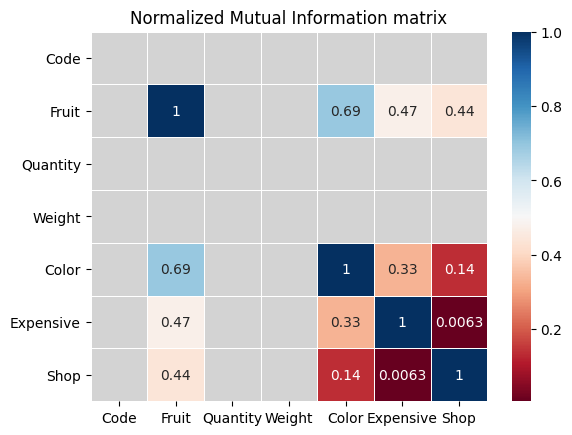

In [15]:
print("Normalized mutual information matrix:")
plots.plot_norm_mutual_info(MyDataset)

Además del cálculo de interrelaciones entre pares de atributos, otra métrica muy útil que se nos proporciona en la librería *datapack* es el cálculo del área bajo la curva ROC (AUC). Dado un atributo numérico y una clase lógica, el area bajo la curva ROC se calcula a partir de los resultados obtenidos utilizando el atributo numérico para predecir el valor de la clase. Es decir, lo que se hace es comprobar lo qué ocurriría si considerásemos todos los valores de la variable numérica como puntos de corte para decidir si la clase es True (por encima del punto de corte) o False (por debajo del punto de corte). Cuanto mayor el área bajo la curva ROC, mayor el potencial de la variable numérica a la hora de predecir el valor de la clase.

El cálculo del área bajo la curva ROC se puede realizar mediante la función *roc_auc*. Si lo que queremos es obtener el AUC para todas las variables numéricas, podemos utilizar la función *roc_auc_att*. Como la clase ya ha sido especificada durante la inicialización del conjunto de datos, no es necesario volver a indicarla en este punto.

In [16]:
print("AUC for the Weight (Class variable: Expensive):")
print(MyDataset.roc_auc("Weight"))
print()
print("AUC for all the numerical attributes (Class variable: Expensive):")
mat = MyDataset.roc_auc_att()
for key,val in mat.items():
    print(key,": ",val)

AUC for the Weight (Class variable: Expensive):
0.7916666666666666

AUC for all the numerical attributes (Class variable: Expensive):
Code :  0.75
Fruit :  nan
Quantity :  0.47916666666666663
Weight :  0.7916666666666666
Color :  nan
Expensive :  nan
Shop :  nan


Para una mejor visualización de los resultados, la función *plot_roc* nos ofrece la posibilidad de representar gráficamente la curva ROC de una variable concreta. El valor de AUC correspondiente se indica en la esquina inferior derecha.

ROC curve for the Weight:


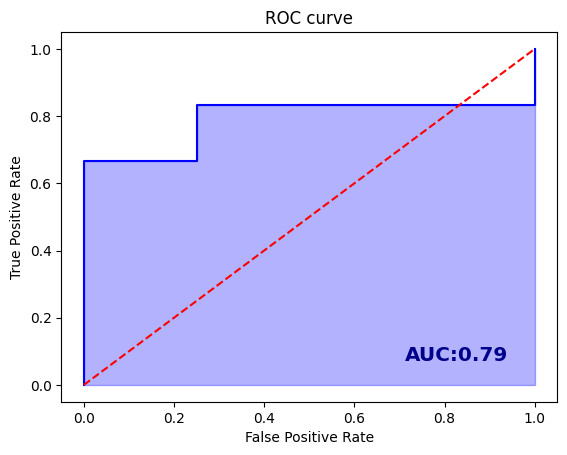

In [17]:
print("ROC curve for the Weight:")
plots.plot_roc(MyDataset,"Weight")

## Funciones para el preproceso de atributos numéricos

Otra de las opciones que más puede interesar a la hora de trabajar con un conjunto de datos es el preproceso de las variables numéricas. En esta librería se ofrecen tres funcionalidades principales para este propósito: la normalización, la estandarización y la discretización.

Por un lado, la normalización es el proceso de transformar la escala de una variable al rango [0,1]. Esto suele ser interesante cuando los rangos de las variables son muy dispares, ya que de esta forma podemos convertir todos los atributos a un rango común. En este librería, la normalización se puede realizar mediante la función *normalize* en el caso de un solo atributo, y mediante la función *normalize_att* en el caso del conjunto de datos completo.

In [18]:
print("Weight attribute before normalizing:")
MyDataset.get_attribute("Weight").print_data()
print()
print("Weight attribute after normalizing:")
MyDataset.normalize("Weight")
MyDataset.get_attribute("Weight").print_data()

Weight attribute before normalizing:
Attribute type: Numerical
Attribute values:
0    2.2
1    3.1
2    1.0
3    9.7
4    1.6
5    4.5
6    6.5
7    2.3
8    3.8
9    2.4
Name: Weight, dtype: float64

Weight attribute after normalizing:
Attribute type: Numerical
Attribute values:
0    0.137931
1    0.241379
2    0.000000
3    1.000000
4    0.068966
5    0.402299
6    0.632184
7    0.149425
8    0.321839
9    0.160920
Name: Weight, dtype: float64


Otra posible opción para homogeneizar los valores de las variables numéricas en un conjunto de datos es lo que se conoce como estandarización. Este proceso se basa en restar a una variable su media y después dividir el resultado por la desviación típica. De esta forma, los datos resultantes tendrán media 0 y desviación típica 1. La estandarización se puede aplicar utlizando la función *standarize* en el caso de un solo atributo, y mediante la función *standarize_att* en el caso del conjunto de datos entero.

In [19]:
print("Quantity attribute before standarizing:")
MyDataset.get_attribute("Quantity").print_data()
print()
print("Quantity attribute after standarizing:")
MyDataset.standarize("Quantity")
MyDataset.get_attribute("Quantity").print_data()

Quantity attribute before standarizing:
Attribute type: Numerical
Attribute values:
0    3
1    2
2    5
3    4
4    8
5    7
6    1
7    4
8    1
9    6
Name: Quantity, dtype: int64

Quantity attribute after standarizing:
Attribute type: Numerical
Attribute values:
0   -0.453718
1   -0.866189
2    0.371224
3   -0.041247
4    1.608637
5    1.196166
6   -1.278660
7   -0.041247
8   -1.278660
9    0.783695
Name: Quantity, dtype: float64


Por último, la librería *datapack* también incluye técnicas de discretización. Es decir, ofrece la posibilidad de agrupar los distintos valores de las variables numéricas en intervalos, convertiéndolas así en variables categóricas. Las técnicas de discretización disponibles son las siguientes:

- **Discretización *equal width*:** El rango de la variable numérica se divide en una cierta cantidad de intervalos (*num_bins*) de igual tamaño. Se puede aplicar mediante la función *discretize* con *method=width* en el caso de un solo atributo, y mediante la función *discretize_att* con *method=width* en el caso del conjunto de datos completo.

- **Discretización *equal frequency*:** El rango de la variable numérica se divide en una cierta cantidad de intervalos (*num_bins*) tal que cada intervalo contiene la misma cantidad de observaciones (+/-1). Se puede aplicar mediante la función *discretize* con *method=frequency* en el caso de un solo atributo, y mediante la función *discretize_att* con *method=frequency* en el caso del conjunto de datos completo. **ADVERTENCIA:** En caso de haber observaciones con valores repetidos, este tipo de discretización podría producir resultados no deseados.

- **Discretización personalizada:** El rango de la variable numérica se divide según los puntos de corte proporcionados (*cut_points*). Está disponible para un solo atributo mediante la función *discretize* con *method=custom*.

In [20]:
print("Dataset before discretizing:")
MyDataset.print_dataset()
print()
print("Dataset after discretizing:")
MyDataset.discretize("Code",method="frequency",num_bins=5)
MyDataset.discretize("Quantity",method="custom",cut_points=[-1,0,1])
MyDataset.discretize("Weight",method="width",num_bins=4)
MyDataset.print_dataset()

Dataset before discretizing:


,Code,Fruit,Quantity,Weight,Color,Expensive,Shop
0,1,Apple,-0.453718,0.137931,Red,False,Tienda Marlo
1,4,Orange,-0.866189,0.241379,Orange,False,Tienda Marlo
2,3,Banana,0.371224,0.000000,Yellow,True,Tienda Pepe
3,5,Watermelon,-0.041247,1.000000,Green,True,Tienda Pepe
4,1,Apple,1.608637,0.068966,Green,False,Tienda Marlo
5,19,Guava,1.196166,0.402299,Green,True,Tienda Marlo
6,12,Pineapple,-1.278660,0.632184,Brown,True,Tienda Marlo
7,8,Lima,-0.041247,0.149425,Green,False,Tienda Pepe
8,7,Lemon,-1.278660,0.321839,Yellow,True,Tienda Marlo
9,2,Pear,0.783695,0.160920,Green,True,Tienda Marlo


Dataset class: Expensive

Dataset after discretizing:


,Code,Fruit,Quantity,Weight,Color,Expensive,Shop
0,"(-infinity, 1]",Apple,"(-1, 0]","(-infinity, 0.25]",Red,False,Tienda Marlo
1,"(3, 5]",Orange,"(-1, 0]","(-infinity, 0.25]",Orange,False,Tienda Marlo
2,"(1, 3]",Banana,"(0, 1]","(-infinity, 0.25]",Yellow,True,Tienda Pepe
3,"(3, 5]",Watermelon,"(-1, 0]","(0.75, infinity)",Green,True,Tienda Pepe
4,"(-infinity, 1]",Apple,"(1, infinity)","(-infinity, 0.25]",Green,False,Tienda Marlo
5,"(8, infinity)",Guava,"(1, infinity)","(0.25, 0.5]",Green,True,Tienda Marlo
6,"(8, infinity)",Pineapple,"(-infinity, -1]","(0.5, 0.75]",Brown,True,Tienda Marlo
7,"(5, 8]",Lima,"(-1, 0]","(-infinity, 0.25]",Green,False,Tienda Pepe
8,"(5, 8]",Lemon,"(-infinity, -1]","(0.25, 0.5]",Yellow,True,Tienda Marlo
9,"(1, 3]",Pear,"(0, 1]","(-infinity, 0.25]",Green,True,Tienda Marlo


Dataset class: Expensive


## Filtrado del conjunto de datos

Para finalizar, la librería *datapack* incluye una opción de filtrado de los atributos predictores mediante la función *filter_by*. Es decir, nos permite establecer una métrica (*metric*), un punto de corte (*threshold*) y un operador de comparación (*comparator*) a partir de los cuales realizar un filtrado de las variables. Las métricas disponibles son el área bajo la curva ROC, la varianza, la media y la mediana en el caso de las variables numéricas, y la entropía en el caso de las variables no numéricas. En cuanto a los operadores de comparación, se permiten los operadores *lt* (<), *le* (<=), *gt* (>), *ge* (>=), *eq* (=) y *neq* (!=).

Como ejemplo, a continuación filtramos los atributos no numéricos para quedarnos solo con aquellos que tengan una entropía mayor que 2. Cabe destacar que la variable clase (en este caso, *Expensive*) no es tenida en cuenta durante el filtrado.

In [21]:
print("Entropy of the non-numerical attributes (including the discretized variables):")
print(MyDataset.entropy_att())
MyDataset.filter_by(metric="entropy",threshold=2,comparator="gt")
print()
print("Dataset after applying the filter:")
MyDataset.print_dataset()

Entropy of the non-numerical attributes (including the discretized variables):
{'Code': 2.321928094887362, 'Fruit': 3.121928094887362, 'Quantity': 1.9219280948873623, 'Weight': 1.5709505944546687, 'Color': 1.9609640474436814, 'Expensive': 0.9709505944546686, 'Shop': 0.8812908992306927}

Dataset after applying the filter:


,Code,Fruit,Expensive
0,"(-infinity, 1]",Apple,False
1,"(3, 5]",Orange,False
2,"(1, 3]",Banana,True
3,"(3, 5]",Watermelon,True
4,"(-infinity, 1]",Apple,False
5,"(8, infinity)",Guava,True
6,"(8, infinity)",Pineapple,True
7,"(5, 8]",Lima,False
8,"(5, 8]",Lemon,True
9,"(1, 3]",Pear,True


Dataset class: Expensive
